In [ ]:
import tensorflow as tf
import tensorflow as keras

In [ ]:
print(tf.__version__)

2.4.1


Define Keras Model

In [ ]:
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input,Dense

In [ ]:
model=Sequential()
model.add(Dense(units=8,input_shape=(3,)))
#model.add(Dense(units=8,input_dim=(3)))
model.add(Dense(units=4))
model.add(Dense(units=1))

In [ ]:
inpTensor=Input((3,))
hidden1out=Dense(units=8)(inpTensor)
hidden2out=Dense(units=4)(hidden1out)
finalout=Dense(units=1)(hidden2out)
model=Model(inpTensor,finalout )

In [ ]:
visible = Input(shape=(8,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
None


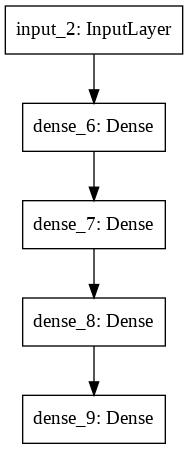

In [ ]:
plot_model(model, to_file='multilayer_perceptron_graph.png')
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Shared Input Layer

In [ ]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

In [ ]:

visible = Input(shape=(128,128,1))

conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
merge = concatenate([flat1, flat2])
hidden1 = Dense(10, activation='relu')(merge)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [ ]:
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 125, 125, 32) 544         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 121, 121, 16) 1040        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 62, 62, 32)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

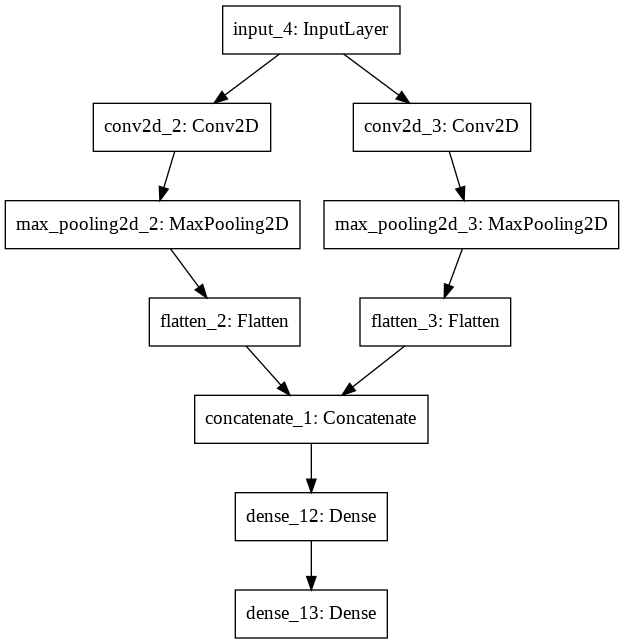

In [ ]:
plot_model(model, to_file='shared_input_layer.png')

Multiple Input Models

In [ ]:
# first input model
visible1 = Input(shape=(64,64,1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)
# second input model
visible2 = Input(shape=(32,32,3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)
# merge input models
merge = concatenate([flat1, flat2])
# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)

In [ ]:
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 61, 61, 32)   544         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 29, 29, 32)   1568        input_6[0][0]                    
____________________________________________________________________________________________

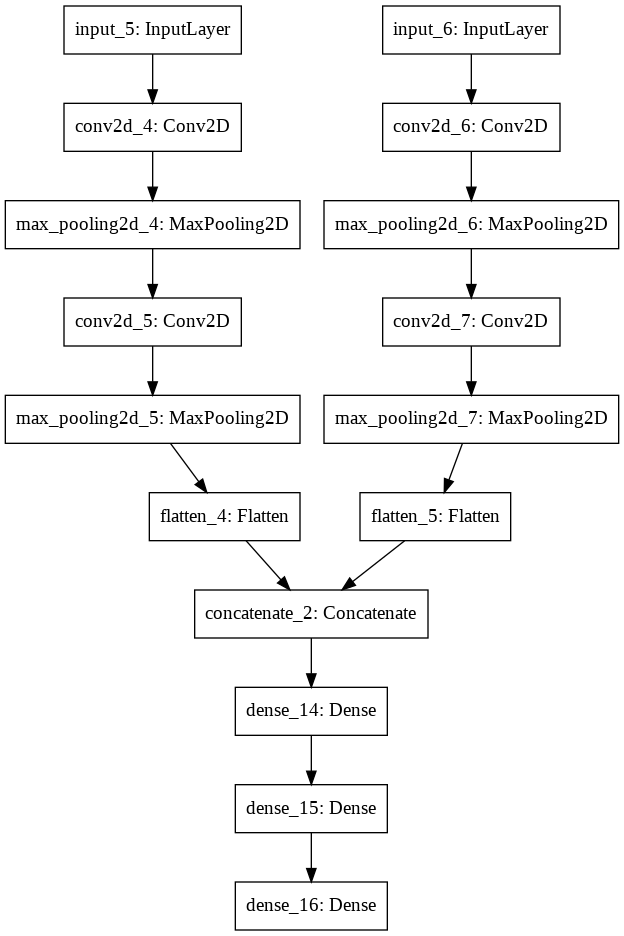

In [ ]:
plot_model(model, to_file='multiple_inputs.png')

Multiple Output Model

In [ ]:
Input_1= Input(shape=(200, ))

x = Dense(100, activation='relu')(Input_1)
x1 = Dense(50, activation='relu')(x)
x2 = Dense(10, activation='softmax')(x1)

out1 = Dense(1,  activation='linear')(x2)
out1 = Dense(5,  activation='relu')(out1)

out2 = Dense(1,  activation='sigmoid')(x)


model = Model(inputs=Input_1, outputs=[out1,out2])

In [ ]:
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 100)          20100       input_7[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 50)           5050        dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10)           510         dense_18[0][0]                   
____________________________________________________________________________________________

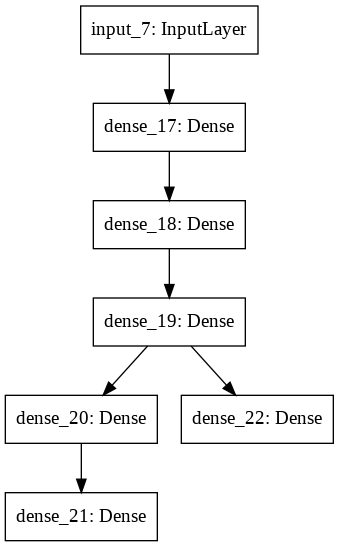

In [ ]:
plot_model(model, to_file='multiple_outputs.png')